# Exploring NHL dataset

### Importing necessary libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model  as lm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline

### Importing Dataset

In [13]:
df = pd.read_csv('/Users/Jdoyle216/Downloads/archive-5/train.csv',encoding = "ISO-8859-1")

In [14]:
df.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [15]:
# too many columns to show them all with .head() method so instead:
print(list(df.columns))

#This will be easier to refer to

['Salary', 'Born', 'City', 'Pr/St', 'Cntry', 'Nat', 'Ht', 'Wt', 'DftYr', 'DftRd', 'Ovrl', 'Hand', 'Last Name', 'First Name', 'Position', 'Team', 'GP', 'G', 'A', 'A1', 'A2', 'PTS', '+/-', 'E+/-', 'PIM', 'Shifts', 'TOI', 'TOIX', 'TOI/GP', 'TOI/GP.1', 'TOI%', 'IPP%', 'SH%', 'SV%', 'PDO', 'F/60', 'A/60', 'Pct%', 'Diff', 'Diff/60', 'iCF', 'iCF.1', 'iFF', 'iSF', 'iSF.1', 'iSF.2', 'ixG', 'iSCF', 'iRB', 'iRS', 'iDS', 'sDist', 'sDist.1', 'Pass', 'iHF', 'iHF.1', 'iHA', 'iHDf', 'iMiss', 'iGVA', 'iTKA', 'iBLK', 'iGVA.1', 'iTKA.1', 'iBLK.1', 'BLK%', 'iFOW', 'iFOL', 'iFOW.1', 'iFOL.1', 'FO%', '%FOT', 'dzFOW', 'dzFOL', 'nzFOW', 'nzFOL', 'ozFOW', 'ozFOL', 'FOW.Up', 'FOL.Up', 'FOW.Down', 'FOL.Down', 'FOW.Close', 'FOL.Close', 'OTG', '1G', 'GWG', 'ENG', 'PSG', 'PSA', 'G.Bkhd', 'G.Dflct', 'G.Slap', 'G.Snap', 'G.Tip', 'G.Wrap', 'G.Wrst', 'CBar ', 'Post', 'Over', 'Wide', 'S.Bkhd', 'S.Dflct', 'S.Slap', 'S.Snap', 'S.Tip', 'S.Wrap', 'S.Wrst', 'iPenT', 'iPenD', 'iPENT', 'iPEND', 'iPenDf', 'NPD', 'Min', 'Maj', '

In [32]:
#Let's concat the first and last names
df['Name'] = df['First Name'] + [' '] + df['Last Name']
df.Name.head()

0      Thomas Chabot
1          Cody Ceci
2        Kyle Okposo
3    Erik Gudbranson
4         Tom Wilson
Name: Name, dtype: object

## Player Ages

In [17]:
df.Born.max()

'98-07-29'

In [18]:
# I don't like the way the date is formatted so I'll change to yyyy-mm-dd
df['Born2'] = '19' + df['Born']
df.Born2

0      1997-01-30
1      1993-12-21
2      1988-04-16
3      1992-01-07
4      1994-03-29
          ...    
607    1992-09-26
608    1985-01-21
609    1987-03-30
610    1982-10-31
611    1993-05-12
Name: Born2, Length: 612, dtype: object

In [19]:
#now using the birthdates we can find the current age of each player
def age(born):
    born = datetime.strptime(born, '%Y-%m-%d').date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))


  
df['Age'] = df['Born2'].apply(age)
  
print(df['Age'])

0      24
1      27
2      33
3      29
4      27
       ..
607    28
608    36
609    34
610    38
611    28
Name: Age, Length: 612, dtype: int64


In [20]:
df.drop(['Born'], axis=1,inplace=True)
df.rename(columns={"Born2": "Born"},inplace=True)

In [21]:
df['Age'].describe()

count    612.000000
mean      30.727124
std        4.449651
min       23.000000
25%       27.000000
50%       30.000000
75%       34.000000
max       49.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

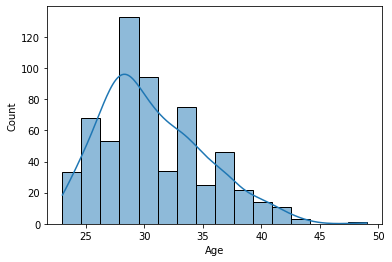

In [22]:
#now that we have age, lets see what it looks like as a distribution
sns.histplot(data=df,x='Age',kde=True)

In [23]:
df['Age'].corr(df['Salary'])
#unsurprisngly age is corelated with salary although not very strongly

0.42261424446256834

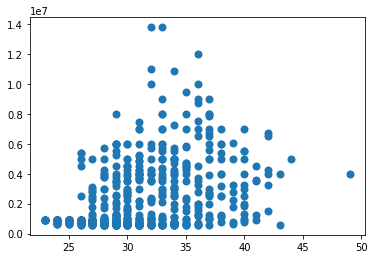

In [24]:
plt.scatter('Age','Salary', data=df, linewidth=2)

In [25]:
#interesting outlier at almost 50 in a high contact sport
oldest_player = df[df['Age'] == df['Age'].max()]['Last Name']
print(oldest_player)
# I had a feeling it was Jagr or Chara
# plenty of palyers over forty despite contact sport surprisingy. Consider NFL Brady etc.

131    Jagr
Name: Last Name, dtype: object


## Further EDA

<AxesSubplot:xlabel='count', ylabel='Cntry'>

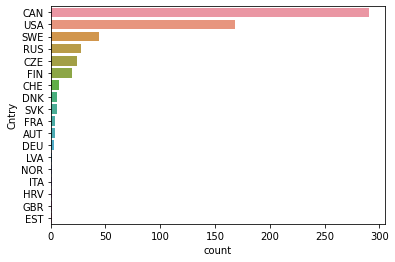

In [26]:
#Switching Gears lets take a look at the countries column
order1 = df.Cntry.value_counts().index

sns.countplot(data=df,y='Cntry',order=order1)

#unsurprisingly Canada reigns supreme

<AxesSubplot:xlabel='Ht', ylabel='Count'>

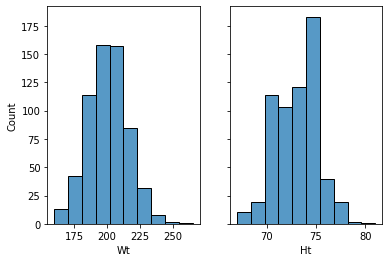

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.histplot(data=df,x='Wt',bins=10, ax=ax1)
sns.histplot(data=df,x='Ht',bins=10, ax=ax2)

In [205]:
df.isnull().sum(axis = 0).sort_values(ascending=False).head(50)

Pr/St      153
Ovrl       100
DftRd      100
DftYr      100
sDist.1     16
iHA          9
iCF          8
iHDf         8
iSF          8
iFF          8
iRB          8
iDS          7
SH%          2
GS/G         2
PDO          2
TOI%         1
iPENT        1
CF           1
A/60         1
iFOW.1       1
iFOL.1       1
iHF.1        1
%FOT         1
iPEND        1
F/60         1
Pass         1
IPP%         1
SV%          1
iRS          1
FF           1
iSCF         1
ixG          1
TOIX         1
CA           1
FA           1
Diff/60      1
FOL          1
iGVA.1       1
GS           1
Pace         1
iTKA.1       1
OTOI         1
iBLK.1       1
BLK%         1
PEND         1
PENT         1
TKA          1
GVA          1
HA           1
SF           1
dtype: int64

In [206]:
df[df['Pace'].isnull()]

,Salary,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,...,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Name,Born,Age
290,692500,Pickering,ON,CAN,CAN,74,205,NaN,NaN,NaN,...,0.0,NaN,3,0.0,NaN,NaN,NaN,Dan Renouf,1994-06-01,27


In [207]:
df.drop([0,290],inplace=True)

In [208]:
df.isnull().sum(axis = 0).sort_values(ascending=False).head(17)

Pr/St      153
DftYr       99
Ovrl        99
DftRd       99
sDist.1     15
iHA          8
iHDf         8
iSF          7
iDS          7
iFF          7
iCF          7
iRB          7
PDO          1
SH%          1
IPP%         1
GS/G         1
Pass         1
dtype: int64

## Draft Round

In [209]:
df.DftRd.dtype

dtype('float64')

In [210]:
df['DftRd'].fillna(8.0, inplace = True)
df.DftRd.replace({9: 8}, inplace=True)

<AxesSubplot:xlabel='DftRd', ylabel='Count'>

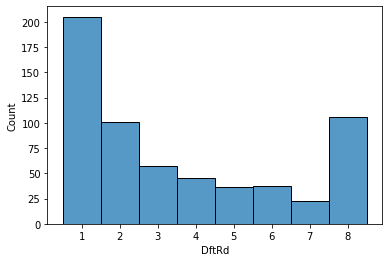

In [211]:
df['DftRd'].value_counts()
sns.histplot(x='DftRd',data=df, discrete=True)

## Dropping unecessary columns

In [212]:


df2 = df[['Salary', 'Name', 'Born', 'Age', 'City', 'Pr/St', 'Cntry', 'Nat', 'Ht', 'Wt', 'DftYr', 'DftRd', 'Ovrl', 'Hand', 'Position', 'Team', 'GP', 'G', 'A', 'PTS', '+/-', 'E+/-', 'PIM', 'Shifts', 'TOI']]

In [213]:
df2.head()

,Salary,Name,Born,Age,City,Pr/St,Cntry,Nat,Ht,Wt,...,Team,GP,G,A,PTS,+/-,E+/-,PIM,Shifts,TOI
1,2250000,Cody Ceci,1993-12-21,27,Ottawa,ON,CAN,CAN,74,207,...,OTT,79,2,15,17,-11,-10.4,20,2418,109992
2,8000000,Kyle Okposo,1988-04-16,33,St. Paul,MN,USA,USA,72,218,...,BUF,65,19,26,45,-7,-1.4,24,1443,73983
3,3500000,Erik Gudbranson,1992-01-07,29,Ottawa,ON,CAN,CAN,77,220,...,VAN,30,1,5,6,-14,-5.3,18,765,36603
4,1750000,Tom Wilson,1994-03-29,27,Toronto,ON,CAN,CAN,76,217,...,WSH,82,7,12,19,9,4.1,133,1453,63592
5,1500000,Brian Campbell,1979-05-23,42,Strathroy,ON,CAN,CAN,70,192,...,CHI,80,5,12,17,12,0.7,24,1896,88462


## Correlations

In [31]:
sns.heatmap(df2.corr())

NameError: name 'df2' is not defined

In [224]:
cor1 = df2['Wt'].corr(df2['Salary'])
cor2 = df2['Wt'].corr(df2['Ht'])
cor3 = df2['Wt'].corr(df2['Age'])
cor4 = df2['Wt'].corr(df2['PIM'])

In [225]:
print("correlation of a player's Weight and Salary is {:0.2f}".format(cor1))
print("correlation of a player's Weight and Height is {:0.2f}".format(cor2))
print("correlation of a player's Weight and Age is {:0.2f}".format(cor3))
print("correlation of a player's Weight and Penalty Minutes is {:0.2f}".format(cor4))

correlation of a player's Weight and Salary is 0.18
correlation of a player's Weight and Height is 0.72
correlation of a player's Weight and Age is 0.15
correlation of a player's Weight and Penalty Minutes is 0.29


Text(0, 0.5, 'Salary')

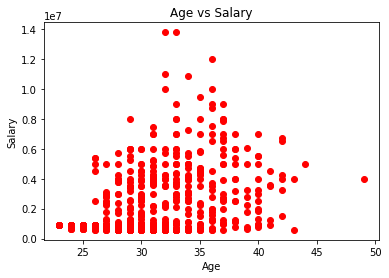

In [229]:
plt.scatter('Age','Salary', data=df2, color='red', linewidth=1)

plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

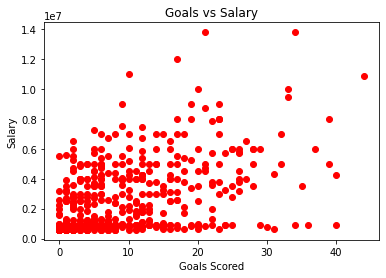

In [228]:
plt.scatter('G','Salary', data=df2, color='red', linewidth=1)
plt.title("Goals vs Salary")
plt.xlabel("Goals Scored")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

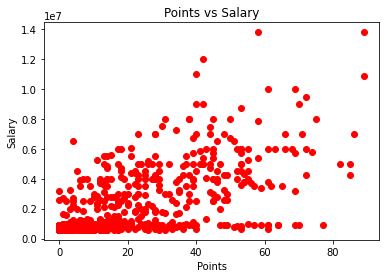

In [230]:
plt.scatter('PTS','Salary', data=df2, color='red', linewidth=1)
plt.title("Points vs Salary")
plt.xlabel("Points")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

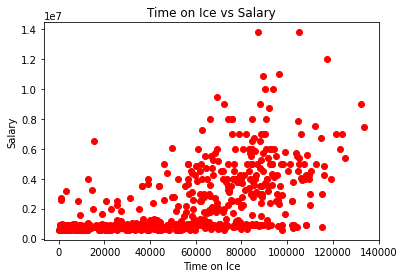

In [231]:
plt.scatter('TOI','Salary', data=df2, color='red', linewidth=1)
plt.title("Time on Ice vs Salary")
plt.xlabel("Time on Ice")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

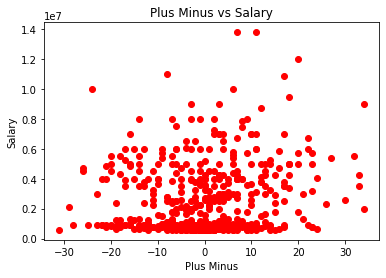

In [232]:
plt.scatter('+/-','Salary', data=df2, color='red', linewidth=1)
plt.title("Plus Minus vs Salary")
plt.xlabel("Plus Minus")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

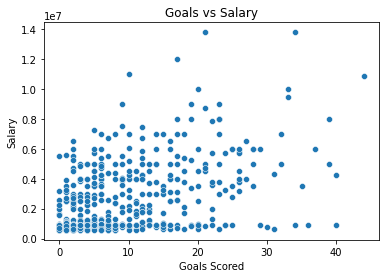

In [233]:
sns.scatterplot('G','Salary', data=df2)
plt.title("Goals vs Salary")
plt.xlabel("Goals Scored")
plt.ylabel("Salary")

In [170]:
df2.groupby('Position').describe()
#doesn't really tell us much. The combination of position just makes it convoluted.
#could divide between D and Forward and drop the d/f combos to see what that looks like

Salary                                                               \
          count          mean           std        min        25%        50%   
Position                                                                       
C          96.0  2.102387e+06  2.448313e+06   575000.0   663125.0   925000.0   
C/D         1.0  9.250000e+05           NaN   925000.0   925000.0   925000.0   
C/LW       46.0  1.905587e+06  1.754793e+06   575000.0   794375.0   925000.0   
C/LW/RW     5.0  1.625000e+06  1.468630e+06   900000.0   925000.0  1000000.0   
C/RW       31.0  2.623952e+06  2.575072e+06   575000.0   816250.0   950000.0   
C/RW/LW     5.0  1.430000e+06  8.290431e+05   675000.0   925000.0   950000.0   
D         201.0  2.410695e+06  2.156402e+06   575000.0   800000.0  1100000.0   
D/LW        1.0  7.925000e+05           NaN   792500.0   792500.0   792500.0   
LW         52.0  2.086721e+06  2.275456e+06   575000.0   725000.0   925000.0   
LW/C       34.0  1.996176e+06  1.957469e+06   575000.0   717500.0   900000.0   
LW/C/RW     6.0  2.945688e+06  1.837751e+06   874125.0  1662500.0  2925000.0   
LW/RW      26.0  2.506442e+06  2.217585e+06   600000.0   825000.0  1800000.0   
LW/RW/C     2.0  2.375000e+06  2.298097e+06   750000.0  1562500.0  2375000.0   
RW         64.0  2.150938e+06  2.172271e+06   575000.0   698125.0   925000.0   
RW/C       15.0  3.037333e+06  4.115230e+06   575000.0   600000.0   675000.0   
RW/C/LW     4.0  3.375000e+06  1.479020e+06  1250000.0  2937500.0  3875000.0   
RW/LW      18.0  2.380556e+06  2.018782e+06   650000.0   931250.0  1200000.0   
RW/LW/C     3.0  2.783333e+06  1.853600e+06   650000.0  2175000.0  3700000.0   

                                   Age             ...   Shifts          \
                75%         max  count       mean  ...      75%     max   
Position                                           ...                    
C         3500000.0  13800000.0   96.0  30.062500  ...  1772.00  2056.0   
C/D        925000.0    925000.0    1.0  24.000000  ...    34.00    34.0   
C/LW      2375000.0   6000000.0   46.0  30.608696  ...  1530.75  2067.0   
C/LW/RW   1050000.0   4250000.0    5.0  28.600000  ...   685.00  1501.0   
C/RW      4375000.0   9500000.0   31.0  30.709677  ...  1781.50  2258.0   
C/RW/LW   2000000.0   2600000.0    5.0  30.600000  ...  1459.00  1567.0   
D         4000000.0  12000000.0  201.0  31.009950  ...  1971.00  2657.0   
D/LW       792500.0    792500.0    1.0  32.000000  ...   505.00   505.0   
LW        2575000.0   9000000.0   52.0  29.634615  ...  1462.75  2085.0   
LW/C      2631250.0   6500000.0   34.0  30.500000  ...  1617.25  2047.0   
LW/C/RW   3512500.0   6000000.0    6.0  30.833333  ...  1874.50  1922.0   
LW/RW     3375000.0  10000000.0   26.0  32.653846  ...  1586.50  2019.0   
LW/RW/C   3187500.0   4000000.0    2.0  33.500000  ...  1589.00  1598.0   
RW        3500000.0  10000000.0   64.0  30.750000  ...  1556.00  2150.0   
RW/C      4137500.0  13800000.0   15.0  32.800000  ...  1658.00  1910.0   
RW/C/LW   4312500.0   4500000.0    4.0  30.250000  ...  1813.00  1948.0   
RW/LW     3750000.0   8000000.0   18.0  31.555556  ...  1598.50  2049.0   
RW/LW/C   3850000.0   4000000.0    3.0  30.666667  ...  1672.50  1840.0   

            TOI                                                          \
          count          mean           std      min       25%      50%   
Position                                                                  
C          96.0  45277.562500  33736.598853    505.0   6863.50  44681.0   
C/D         1.0   1645.000000           NaN   1645.0   1645.00   1645.0   
C/LW       46.0  49263.043478  26566.701620    704.0  34473.75  58476.0   
C/LW/RW     5.0  28085.200000  24029.543726   5643.0  12902.00  24361.0   
C/RW       31.0  53318.774194  34793.938691    440.0  22209.50  62152.0   
C/RW/LW     5.0  39109.200000  27081.011368   9551.0  12430.00  45998.0   
D         201.0  62572.746269  39046.329531    908.0  22592.00  68471.0   
D/

In [147]:
dfsorted = df2.sort_values(by=['Salary'],ascending=False).reset_index(drop=True)
dfsorted.head()

,Salary,Name,Born,Age,City,Pr/St,Cntry,Nat,Ht,Wt,...,Team,GP,G,A,PTS,+/-,E+/-,PIM,Shifts,TOI
0,13800000,Jonathan Toews,1988-04-29,33,Winnipeg,MB,CAN,CAN,74,201,...,CHI,72,21,37,58,7,-7.3,35,1772,87066
1,13800000,Patrick Kane,1988-11-19,32,Buffalo,NY,USA,USA,71,177,...,CHI,82,34,55,89,11,-6.5,32,1910,105263
2,12000000,Shea Weber,1985-08-14,36,Sicamous,BC,CAN,CAN,76,232,...,MTL,78,17,25,42,20,6.5,38,2218,117286
3,11000000,P.K. Subban,1989-05-13,32,Toronto,ON,CAN,CAN,72,210,...,NSH,66,10,30,40,-8,10.4,44,1860,96640
4,10900000,Sidney Crosby,1987-08-07,34,Cole Harbour,NS,CAN,CAN,71,200,...,PIT,75,44,45,89,17,18.4,24,1852,89450


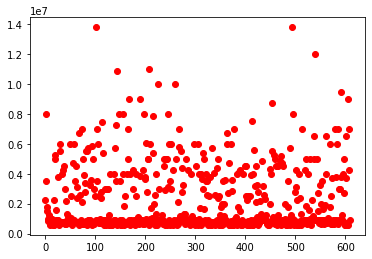

In [148]:
plt.scatter(dfsorted.index,'Salary', data=df2, color='red')

In [149]:
dfsorted = df2.sort_values(by=['Salary'],ascending=False).reset_index(drop=True)
dfsorted.head()

,Salary,Name,Born,Age,City,Pr/St,Cntry,Nat,Ht,Wt,...,Team,GP,G,A,PTS,+/-,E+/-,PIM,Shifts,TOI
0,13800000,Jonathan Toews,1988-04-29,33,Winnipeg,MB,CAN,CAN,74,201,...,CHI,72,21,37,58,7,-7.3,35,1772,87066
1,13800000,Patrick Kane,1988-11-19,32,Buffalo,NY,USA,USA,71,177,...,CHI,82,34,55,89,11,-6.5,32,1910,105263
2,12000000,Shea Weber,1985-08-14,36,Sicamous,BC,CAN,CAN,76,232,...,MTL,78,17,25,42,20,6.5,38,2218,117286
3,11000000,P.K. Subban,1989-05-13,32,Toronto,ON,CAN,CAN,72,210,...,NSH,66,10,30,40,-8,10.4,44,1860,96640
4,10900000,Sidney Crosby,1987-08-07,34,Cole Harbour,NS,CAN,CAN,71,200,...,PIT,75,44,45,89,17,18.4,24,1852,89450


Text(0, 0.5, 'Salary')

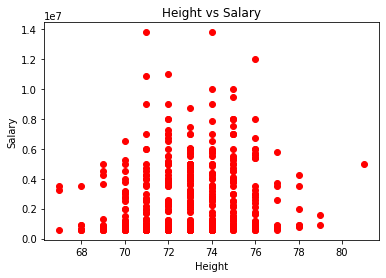

In [234]:
plt.scatter('Ht','Salary', data=df2, color='red', linewidth=1)
plt.title("Height vs Salary")
plt.xlabel("Height")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

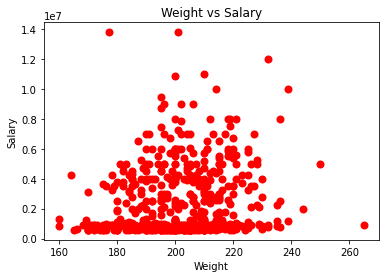

In [235]:
plt.scatter('Wt','Salary', data=df2, color='red', linewidth=2)
plt.title("Weight vs Salary")
plt.xlabel("Weight")
plt.ylabel("Salary")

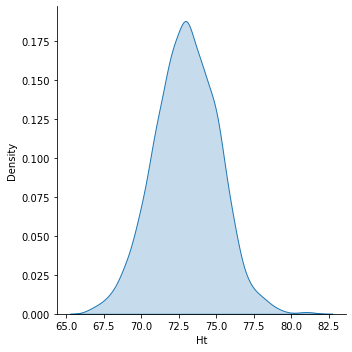

In [152]:
sns.displot(df2, x="Ht", kind="kde", fill=True)

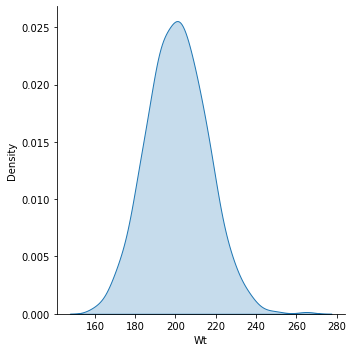

In [153]:
sns.displot(df2, x="Wt", kind="kde", fill=True)

## Player Positions

In [155]:
df2['Position'].unique()

array(['D', 'RW', 'LW/C', 'RW/C/LW', 'C', 'C/RW', 'LW', 'RW/LW',
       'C/LW/RW', 'LW/RW', 'C/LW', 'LW/C/RW', 'LW/RW/C', 'RW/C',
       'C/RW/LW', 'RW/LW/C', 'D/LW', 'C/D'], dtype=object)

> There are alot more combinations than I expected. Too make this less of a mess to work with I'll split things between Forwards and Defensemen. Any player with a position that includes Defense is considered a Defenseman. The rest are Forwards

In [237]:
def f(row):
    if row == 'D':
        val = 'Defenseman'
    elif row == 'D/LW':
        val = 'Defenseman'
    elif row == 'C/D':
        val = 'Defenseman'
    else:
        val = 'Forward'
    return val

df2['D/F'] = df2['Position'].apply(f)

### Exploring Position Visually

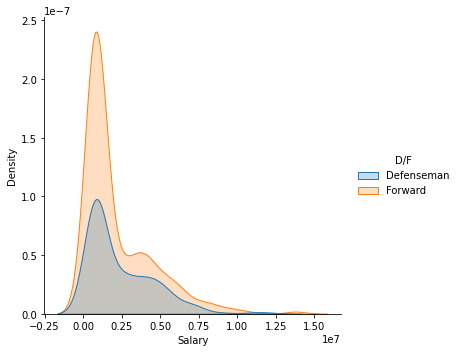

In [158]:
sns.displot(df2, x="Salary", hue="D/F", kind="kde", fill=True)

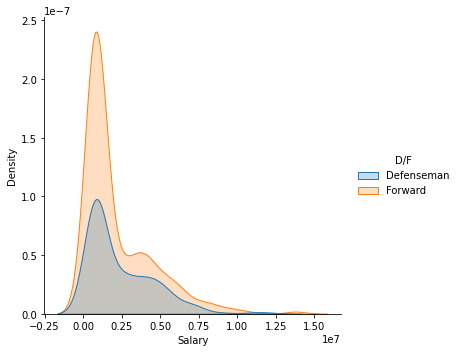

In [159]:
sns.displot(df2, x="Salary", hue="D/F", kind="kde", fill=True)

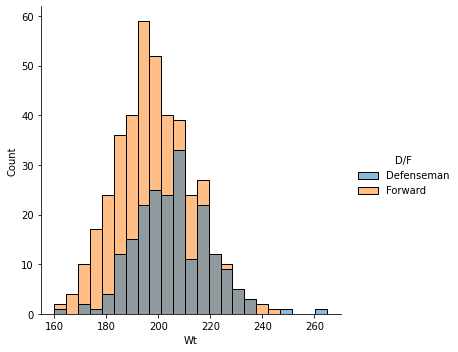

In [160]:
sns.displot(df2, x="Wt", hue="D/F")

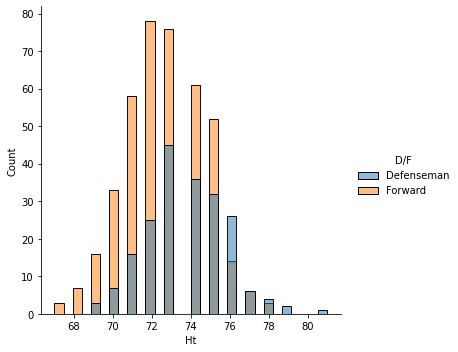

In [161]:
sns.displot(df2, x="Ht", hue="D/F")

<AxesSubplot:xlabel='GP', ylabel='PIM'>

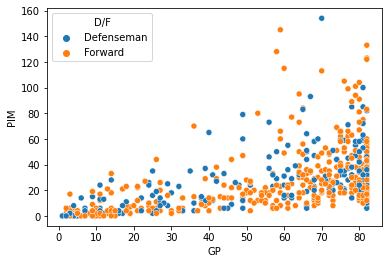

In [162]:
sns.scatterplot(data=df2, x="GP", y='PIM',hue='D/F')

<AxesSubplot:xlabel='GP', ylabel='TOI'>

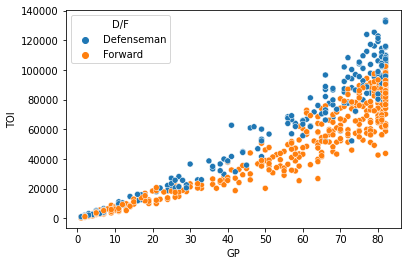

In [163]:
sns.scatterplot(data=df2, x="GP", y='TOI',hue='D/F')

<AxesSubplot:xlabel='Wt', ylabel='Salary'>

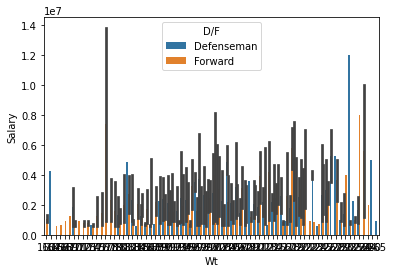

In [164]:
sns.barplot(x='Wt',y='Salary', data=df2, hue='D/F')

## Exploring Player Nationality

<AxesSubplot:xlabel='Salary', ylabel='Cntry'>

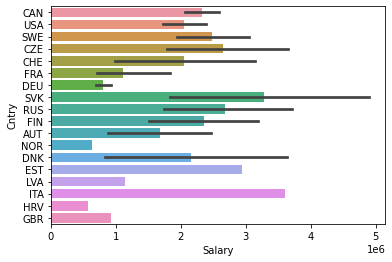

In [165]:
sns.barplot(data=df2,y='Cntry',x='Salary')

<AxesSubplot:xlabel='PIM', ylabel='Cntry'>

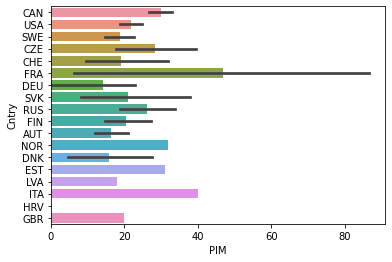

In [166]:
sns.barplot(data=df2,y='Cntry',x='PIM')